## importing datacleaning Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder


## Imporitng data 


In [ ]:

def read_data(link):
    Data=pd.read_csv(link,index_col=0)
    Data.drop_duplicates(inplace=True)
    return Data
Data=read_data("/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Data/Final_cleaned_Data.csv")

In [14]:
Data

,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total,X,Y
0,20316087,Ertvelde,House,house,329000,2,123,1,0,0,...,0,142,1,3,0,Oost-Vlaanderen,Flanders,0,51.120406,3.707520
1,20316069,Hornu,House,house,180000,3,138,0,0,0,...,1,140,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832
2,20316048,Beersel,House,house,369000,6,230,0,0,0,...,0,230,5,3,1,Vlaams-Brabant,Flanders,460,50.766251,4.312619
3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,...,0,80,1,2,0,Oost-Vlaanderen,Flanders,160,50.820984,3.886864
4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,...,170,345,1,2,0,Oost-Vlaanderen,Flanders,500,50.820984,3.886864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,0,89,1,0,0,West-Vlaanderen,Flanders,171,51.298379,3.141601
10680,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,0,129,3,0,0,West-Vlaanderen,Flanders,258,51.346652,3.331958
10681,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,0,157,3,2,0,West-Vlaanderen,Flanders,314,51.346652,3.331958
10682,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,0,...,0,190,1,0,0,West-Vlaanderen,Flanders,380,50.921458,3.260685


#### Nothing empty 

In [12]:
Data.isnull().sum()


Id                    0
Locality              0
Type                  0
SubType               0
Price                 0
Bedrooms              0
Living_Area           0
Is_Equiped_Kitchen    0
Is_Furnished          0
Is_Open_Fire          0
Terrace               0
Terrace_Area          0
Garden                0
Garden_Area           0
Land_Surface          0
State                 0
Facades               0
Swim_pool             0
Muniplicity           0
Region                0
Surface_total         0
X                     0
Y                     0
dtype: int64

In [30]:
def Data_exploration(Data):
    numerical_data =Data.select_dtypes(include=[float, int])
    # Calculate the correlation matrix
    correlation_matrix = numerical_data.corr()
    print(correlation_matrix.Price)
    sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

  
    return




Id                    0.031021
Price                 1.000000
Bedrooms              0.354158
Living_Area           0.469745
Is_Equiped_Kitchen    0.057359
Is_Furnished         -0.024984
Is_Open_Fire          0.088585
Terrace               0.111909
Terrace_Area          0.163179
Garden                0.052013
Garden_Area           0.099540
Land_Surface          0.170649
State                -0.016617
Facades               0.100192
Swim_pool             0.103847
Surface_total         0.227207
X                     0.178599
Y                    -0.078915
Name: Price, dtype: float64


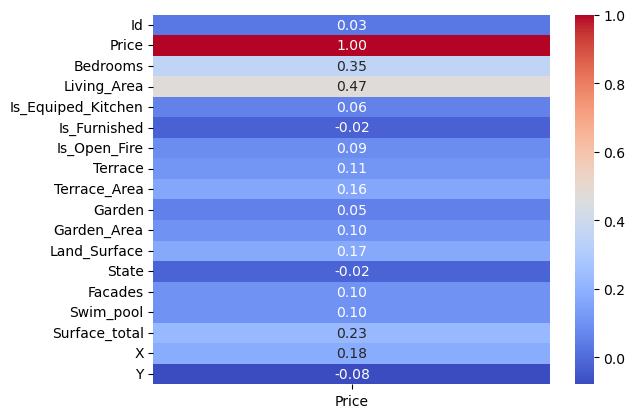

In [31]:
Data_exploration(Data)

## Qualitative (Categorical) Variables:
These variables represent categories or groups:
- Locality (object)
- Type (object)
- SubType (object)
- Sale_Type (object)
- State (object)
- Munplicity (object)
- Region (object)

## Quantitative (Numeric) Variables:

#### These variables represent measurable quantities:
- Price (int64)
- Bedrooms (int64)
- Living_Area (int64)
- Terrace_Area (int64)
- Garden_Area (int64)
- Land_Surface (int64)
- Surface of the plot (int64)
- Facades (int64)
- X(float64)
- Y (float64)

### Boolean Variables:
These are variables that can take two possible values (True or False), and they are stored as integers (0 or 1):

- Is_Equiped_Kitchen (int64)
- Is_Furnished (int64)
- Is_Open_Fire (int64)
- Terrace (int64)
- Garden (int64)
- Swim_pool (int64)

### enCoding

In [32]:
non_numerical_df = Data.select_dtypes(include=['object'])
non_numerical_df.columns

Index(['Locality', 'Type', 'SubType', 'Muniplicity', 'Region'], dtype='object')

In [ ]:
def encoding (Data):

    df1=Data
    # Initialize the label encoder(each locality to integer)
    label_encoder = LabelEncoder()

    # Encode the 'Locality' column
    df1['Locality_encoded'] = label_encoder.fit_transform(df1['Locality'])
    
    
    
    condition_mapping = {
    'Good': 1,
    'Not Known': 2,
    'As new': 3,
    'To renovate': 4,
    'To be done up': 5,
    'Just renovated': 6,
    'To restore': 7
}
    # Alerady done so 

 





    # Binary encoding for Type
    df1['Type_encoded'] = df1['Type'].map({'Apartment': 0, 'House': 1})

    # Label encoding 'SubType' using pandas' factorize method
    df1['SubType_encoded'] = pd.factorize(df1['SubType'])[0]

    # Label encoding 'Region' using pandas' factorize method
    df1['Region_encoded'] = pd.factorize(df1['Region'])[0]
    df1.drop(['Locality', 'Type', 'SubType', 'Muniplicity', 'Region'], axis=1, inplace=True)
    return df1



In [39]:
Encoded_Data= encoding(Data)
Encoded_Data

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,...,State,Facades,Swim_pool,Surface_total,X,Y,Locality_encoded,Type_encoded,SubType_encoded,Region_encoded
0,20316087,329000,2,123,1,0,0,1,0,0,...,1,3,0,0,51.120406,3.707520,358,1,0,0
1,20316069,180000,3,138,0,0,0,1,1,1,...,3,2,1,278,50.423926,3.820832,492,1,0,1
2,20316048,369000,6,230,0,0,0,1,0,0,...,5,3,1,460,50.766251,4.312619,126,1,0,0
3,20316039,145000,2,80,1,0,0,0,0,0,...,1,2,0,160,50.820984,3.886864,403,1,0,0
4,20316038,269000,3,155,1,0,0,1,20,1,...,1,2,0,500,50.820984,3.886864,403,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,0,0,1,7,0,...,1,0,0,171,51.298379,3.141601,180,0,3,0
10680,8945382,699000,4,129,0,0,0,1,0,0,...,3,0,0,258,51.346652,3.331958,535,0,6,0
10681,8746466,950000,2,157,0,0,0,0,0,0,...,3,2,0,314,51.346652,3.331958,535,0,3,0
10682,8498727,562500,3,190,0,0,0,1,0,0,...,1,0,0,380,50.921458,3.260685,509,0,3,0


In [42]:
numerical_data = Encoded_Data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price


Id                    0.031021
Price                 1.000000
Bedrooms              0.354158
Living_Area           0.469745
Is_Equiped_Kitchen    0.057359
Is_Furnished         -0.024984
Is_Open_Fire          0.088585
Terrace               0.111909
Terrace_Area          0.163179
Garden                0.052013
Garden_Area           0.099540
Land_Surface          0.170649
State                -0.016617
Facades               0.100192
Swim_pool             0.103847
Surface_total         0.227207
X                     0.178599
Y                    -0.078915
Locality_encoded      0.154906
Type_encoded          0.075502
SubType_encoded       0.076986
Region_encoded        0.065164
Name: Price, dtype: float64

# All Data is encoded !

Extract important features 

Id                    0.031021
Price                 1.000000
Bedrooms              0.354158
Living_Area           0.469745
Is_Equiped_Kitchen    0.057359
Is_Furnished         -0.024984
Is_Open_Fire          0.088585
Terrace               0.111909
Terrace_Area          0.163179
Garden                0.052013
Garden_Area           0.099540
Land_Surface          0.170649
State                -0.016617
Facades               0.100192
Swim_pool             0.103847
Surface_total         0.227207
X                     0.178599
Y                    -0.078915
Locality_encoded      0.154906
Type_encoded          0.075502
SubType_encoded       0.076986
Region_encoded        0.065164
Name: Price, dtype: float64


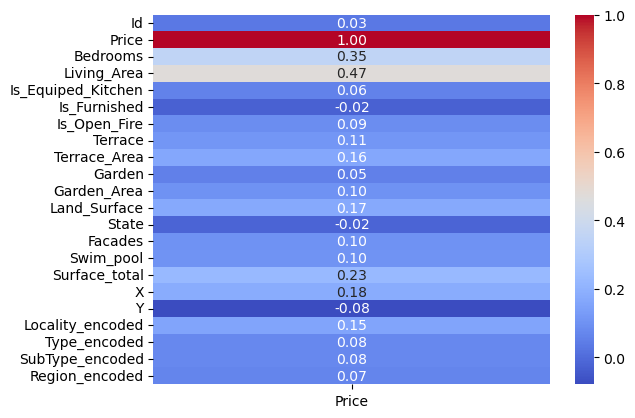

In [44]:
Data_exploration(Encoded_Data)

# Feature Slection


In [49]:
correlation_matrix=Encoded_Data.corr()

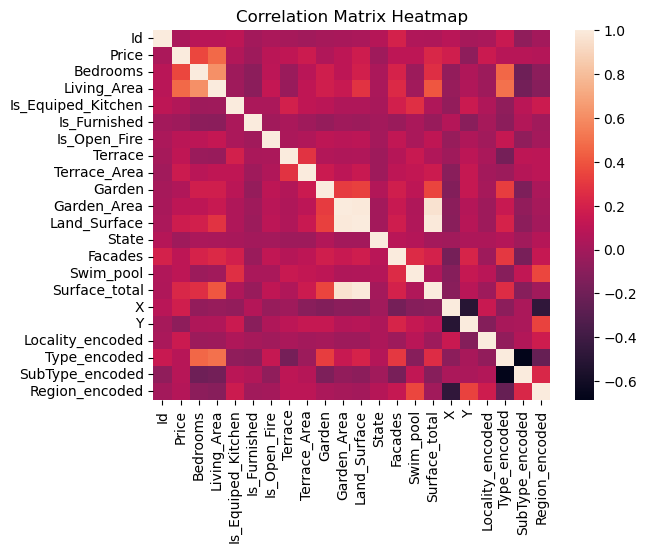

In [51]:
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')



# Show the plot (optional)
plt.show()